Connecté à example-app-aK9VUtvf-py3.11 (Python 3.11.5)

In [5]:
from fastai.vision.all import *

In [6]:
print(URLs.PETS)

https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz


In [7]:
path = untar_data(URLs.PETS)/'images'    

In [8]:
path

Path('/Users/mac/.fastai/data/oxford-iiit-pet/images')

In [9]:
path.lstat()

os.stat_result(st_mode=16877, st_ino=32939939, st_dev=16777220, st_nlink=7395, st_uid=501, st_gid=20, st_size=236640, st_atime=1340038470, st_mtime=1340038470, st_ctime=1694688893)

In [10]:
path.ls()

(#7393) [Path('/Users/mac/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg'),Path('/Users/mac/.fastai/data/oxford-iiit-pet/images/pug_52.jpg'),Path('/Users/mac/.fastai/data/oxford-iiit-pet/images/basset_hound_112.jpg'),Path('/Users/mac/.fastai/data/oxford-iiit-pet/images/Siamese_193.jpg'),Path('/Users/mac/.fastai/data/oxford-iiit-pet/images/shiba_inu_122.jpg'),Path('/Users/mac/.fastai/data/oxford-iiit-pet/images/Siamese_53.jpg'),Path('/Users/mac/.fastai/data/oxford-iiit-pet/images/Birman_167.jpg'),Path('/Users/mac/.fastai/data/oxford-iiit-pet/images/leonberger_6.jpg'),Path('/Users/mac/.fastai/data/oxford-iiit-pet/images/Siamese_47.jpg'),Path('/Users/mac/.fastai/data/oxford-iiit-pet/images/shiba_inu_136.jpg')...]

In [11]:
path.len()

AttributeError: 'PosixPath' object has no attribute 'len'

In [12]:
def animal_labels(filename):    
    return filename[:filename.rfind('_')]  

In [13]:
dls = ImageDataLoaders.from_name_func(
    path,
    get_image_files(path),
    valid_pct = 0.25,
    seed = 42,
    label_func = animal_labels,
    item_tfms = Resize(224))

/Users/mac/Library/Caches/pypoetry/virtualenvs/example-app-aK9VUtvf-py3.11/lib/python3.11/site-packages/fastai/data/transforms.py:225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(col):


In [14]:
for vocab in dls.vocab:
    print(vocab)


Abyssinian
Bengal
Birman
Bombay
British_Shorthair
Egyptian_Mau
Maine_Coon
Persian
Ragdoll
Russian_Blue
Siamese
Sphynx
american_bulldog
american_pit_bull_terrier
basset_hound
beagle
boxer
chihuahua
english_cocker_spaniel
english_setter
german_shorthaired
great_pyrenees
havanese
japanese_chin
keeshond
leonberger
miniature_pinscher
newfoundland
pomeranian
pug
saint_bernard
samoyed
scottish_terrier
shiba_inu
staffordshire_bull_terrier
wheaten_terrier
yorkshire_terrier


In [15]:
learn = vision_learner(dls, resnet34, metrics = error_rate)

/Users/mac/Library/Caches/pypoetry/virtualenvs/example-app-aK9VUtvf-py3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/mac/Library/Caches/pypoetry/virtualenvs/example-app-aK9VUtvf-py3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [16]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.523833,0.317150,1.000000,03:22


epoch,train_loss,valid_loss,error_rate,time
0,0.451288,0.280522,1.000000,05:49


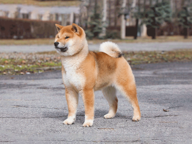

In [17]:

img = PILImage.create('image_card_shiba.png')
img.to_thumb(192)


In [18]:
animal_type, index, probs = learn.predict(img)
print(f"Predicted animal: {animal_type}.") 
print(f"Predicted animal probability: {probs[index]}")
print(f"Probabilities: {probs}")


Predicted animal: shiba_inu.
Predicted animal probability: 0.9999672174453735
Probabilities: tensor([1.1083e-05, 1.7638e-07, 9.2798e-09, 3.9930e-08, 8.9569e-07, 2.9378e-08,
        1.5483e-07, 1.8726e-07, 1.5649e-07, 1.2497e-07, 5.2296e-08, 1.7030e-08,
        2.8983e-08, 3.9334e-07, 1.0255e-06, 9.1319e-07, 2.0888e-07, 1.2269e-07,
        2.9236e-08, 5.4474e-09, 1.2095e-08, 1.4610e-06, 3.9822e-08, 6.8683e-07,
        9.2805e-07, 2.5576e-07, 9.1214e-08, 1.9007e-07, 7.8761e-06, 1.5977e-06,
        5.6965e-07, 2.5132e-06, 4.0973e-08, 9.9997e-01, 6.7372e-07, 1.2364e-07,
        9.4680e-08])


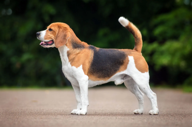

In [19]:

img2 = PILImage.create('beagle-hound-dog.webp')
img2.to_thumb(192)


In [20]:
animal_type, index, probs = learn.predict(img2)
print(f"Predicted animal: {animal_type}.") 
print(f"Predicted animal probability: {probs[index]}")
print(f"Probabilities: {probs}")


Predicted animal: beagle.
Predicted animal probability: 0.9616079330444336
Probabilities: tensor([8.8269e-05, 7.1301e-05, 6.1724e-06, 1.3735e-05, 1.6314e-05, 2.3413e-05,
        1.0310e-04, 3.2415e-05, 2.5220e-04, 1.5032e-05, 7.6539e-06, 2.2860e-05,
        9.5607e-05, 3.3336e-04, 3.1316e-02, 9.6161e-01, 3.1100e-05, 2.3662e-05,
        7.6176e-05, 1.5444e-04, 4.5204e-05, 4.3382e-04, 7.2185e-05, 4.1259e-05,
        1.6937e-05, 5.6292e-04, 3.2010e-05, 1.3627e-04, 2.6510e-05, 1.7309e-05,
        4.0723e-03, 1.5433e-05, 3.4149e-05, 4.4823e-06, 4.2683e-05, 1.3632e-04,
        1.9395e-05])
